In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir = r'C:\College\Deep Learning\Image recognition project module Data set, Presentation and Python Notebook\cats_and_dogs\train'
validation_dir = r'C:\College\Deep Learning\Image recognition project module Data set, Presentation and Python Notebook\cats_and_dogs\validation'
test_dir = r'C:\College\Deep Learning\Image recognition project module Data set, Presentation and Python Notebook\cats_and_dogs\test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [13]:
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/20
100/100 [==============================] - 102s 1s/step - loss: 0.6820 - acc: 0.5650 - val_loss: 0.6716 - val_acc: 0.5440
Epoch 2/20
100/100 [==============================] - 69s 688ms/step - loss: 0.6487 - acc: 0.6290 - val_loss: 0.6260 - val_acc: 0.6620
Epoch 3/20
100/100 [==============================] - 72s 724ms/step - loss: 0.6052 - acc: 0.6695 - val_loss: 0.6160 - val_acc: 0.6570
Epoch 4/20
100/100 [==============================] - 65s 654ms/step - loss: 0.5550 - acc: 0.7160 - val_loss: 0.5909 - val_acc: 0.6820
Epoch 5/20
100/100 [==============================] - 61s 614ms/step - loss: 0.5156 - acc: 0.7440 - val_loss: 0.6206 - val_acc: 0.6590
Epoch 6/20
100/100 [==============================] - 58s 575ms/step - loss: 0.4920 - acc: 0.7580 - val_loss: 0.5559 - val_acc: 0.7110
Epoch 7/20
100/100 [==============================] - 57s 573ms/step - loss: 0.4629 - acc: 0.7840 - val_loss: 0.5669 - val_acc: 0.7100
Epoch 8/20
100/100 [==============================] - 57s

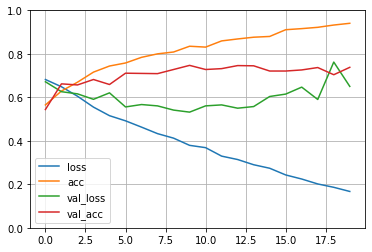

In [14]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
%pwd

'C:\\Users\\subha\\Deep Learning (Internshala)'

In [16]:
model.save("model.h5")